In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DH/Диплом/

/content/drive/MyDrive/DH/Диплом


In [ ]:
df_norm = pd.read_csv("new_df_norm.csv")

In [ ]:
df_norm['Семантическая когорта'] = df_norm['Семантическая когорта'].replace('вкусный', 'вкус')
df_norm['Семантическая когорта'] = df_norm['Семантическая когорта'].replace('размер ', 'размер')
df_norm['Семантическая когорта'] = df_norm['Семантическая когорта'].replace('звучать', 'звук')
df_norm['Часть речи'] = df_norm['Часть речи'].replace('причастие', 'глагол')

In [ ]:
df_norm = df_norm.drop(columns=["Unnamed: 0"])

In [ ]:
df_norm = df_norm.drop(df_norm[df_norm['xviii'] == 0].index &
                       df_norm[df_norm['xix'] == 0].index &
                       df_norm[df_norm['pre1950'] == 0].index &
                       df_norm[df_norm['post1950'] == 0].index)

<ipython-input-406-a212c0e711cc>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  df_norm = df_norm.drop(df_norm[df_norm['xviii'] == 0].index &


In [ ]:
df_norm.loc[df_norm['Устойчивая метафоричность'] == 0]

,Слово,Часть речи,Сенсорная эксклюзивность,Осязание,Зрение,Вкус,Слух,Запах,Устойчивая метафоричность,Дополнительно,xviii,xix,pre1950,post1950,Семантическая когорта
2,ало-красный,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.000000,0.020888,0.005483,цвет
3,алый,прилагательное,1,0,1,0,0,0,0,0,6.511520,5.666675,9.754605,9.359884,цвет
4,амбре,существительное,1,0,0,0,0,1,0,0,0.162788,0.185793,0.052220,0.208363,запах
5,аметистовый,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.119438,0.323761,0.142564,цвет
6,антрацитный,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.000000,0.010444,0.021933,цвет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,ярко-красный,прилагательное,1,0,1,0,0,0,0,0,0.000000,1.778301,3.697142,3.871165,цвет
1018,ярко-оранжевый,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.185793,0.187990,0.723787,цвет
1019,ярко-розовый,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.305231,0.469976,0.657988,цвет
1020,ярко-синий,прилагательное,1,0,1,0,0,0,0,0,0.000000,0.199064,1.023502,1.518856,цвет


In [ ]:
df_norm["Слово"].nunique()

1023

In [ ]:
df_norm["Сенсорная эксклюзивность"].value_counts()

1    849
0    174
Name: Сенсорная эксклюзивность, dtype: int64

In [ ]:
df_norm["Устойчивая метафоричность"].value_counts()

0    883
1    140
Name: Устойчивая метафоричность, dtype: int64

In [ ]:
for index, row in df_norm.iterrows():
    if row["xviii"] < row["xix"]:
        df_norm.at[index, "XIX век"] = 1
    if row["xviii"] > row["xix"]:
        df_norm.at[index, "XIX век"] = -1
    if row["xviii"] == row["xix"]:
        df_norm.at[index, "XIX век"] = 0
    if row["xix"] < row["pre1950"]:
        df_norm.at[index, "До 1950"] = 1
    if row["xix"] > row["pre1950"]:
        df_norm.at[index, "До 1950"] = -1
    if row["xix"] == row["pre1950"]:
        df_norm.at[index, "До 1950"] = 0
    if row["pre1950"] < row["post1950"]:
        df_norm.at[index, "После 1950"] = 1
    if row["pre1950"] > row["post1950"]:
        df_norm.at[index, "После 1950"] = -1
    if row["pre1950"] == row["post1950"]:
        df_norm.at[index, "После 1950"] = 0

In [ ]:
df_norm["Семантическая когорта"].value_counts()

цвет           313
вкус           118
размер          97
осязание        81
форма           77
атмосфера       52
звук            48
температура     44
музыка          36
вонь            35
яркость         33
свет            31
запах           28
голос           23
вещество         7
Name: Семантическая когорта, dtype: int64

In [ ]:
taste = df_norm.loc[(df_norm["Семантическая когорта"] == "вкус")]
size = df_norm.loc[(df_norm["Семантическая когорта"] == "размер")]
touch = df_norm.loc[(df_norm["Семантическая когорта"] == "осязание")]
shape = df_norm.loc[(df_norm["Семантическая когорта"] == "форма")]
atmosphere = df_norm.loc[(df_norm["Семантическая когорта"] == "атмосфера")]
to_sound = df_norm.loc[(df_norm["Семантическая когорта"] == "звук")]
temperature = df_norm.loc[(df_norm["Семантическая когорта"] == "температура")]
music = df_norm.loc[(df_norm["Семантическая когорта"] == "музыка")]
stink = df_norm.loc[(df_norm["Семантическая когорта"] == "вонь")]
brightness = df_norm.loc[(df_norm["Семантическая когорта"] == "яркость")]
light = df_norm.loc[(df_norm["Семантическая когорта"] == "свет")]
smell = df_norm.loc[(df_norm["Семантическая когорта"] == "запах")]
voice = df_norm.loc[(df_norm["Семантическая когорта"] == "голос")]
substance = df_norm.loc[(df_norm["Семантическая когорта"] == "вещество")]

In [ ]:
def cohort(cohort):
  pivot = cohort.pivot_table(columns=['Слово'], values=['xviii', 'xix', 'pre1950', 'post1950'])
  largest = pivot.sum().nlargest(30)
  largest = pd.DataFrame(data=largest)
  for index, row in largest.iterrows():
    letter_pattern = re.findall(r'[а-яё]', str(row))
    letter_join = ''.join(letter_pattern)
    largest.at[index, "Слово"] = letter_join
    number_pattern = re.findall(r'[0-9/.]', str(row))
    number_join = ''.join(number_pattern)
    largest.at[index, "Значение"] = float(number_join[1:])
  return largest

In [ ]:
taste = cohort(taste)
size = cohort(size)
touch = cohort(touch)
shape = cohort(shape)
atmosphere = cohort(atmosphere)
to_sound = cohort(to_sound)
temperature = cohort(temperature)
music = cohort(music)
stink = cohort(stink)
brightness = cohort(brightness)
light = cohort(light)
smell = cohort(smell)
voice = cohort(voice)
substance = cohort(substance)

In [ ]:
largest = cohort(df_norm)

In [ ]:
sns.scatterplot(x=taste["Значение"], y=taste["Слово"], color="lightcoral")
plt.title("Частотные слова семантической когорты (вкус)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_taste.png")
plt.show()

In [ ]:
sns.scatterplot(x=size["Значение"], y=size["Слово"], color="darkorange")
plt.title("Частотные слова семантической когорты (размер)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_size.png")
plt.show()

In [ ]:
sns.scatterplot(x=touch["Значение"], y=touch["Слово"], color="gold")
plt.title("Частотные слова семантической когорты (осязание)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_touch.png")
plt.show()

In [ ]:
sns.scatterplot(x=shape["Значение"], y=shape["Слово"], color="yellow")
plt.title("Частотные слова семантической когорты (форма)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_shape.png")
plt.show()

In [ ]:
sns.scatterplot(x=atmosphere["Значение"], y=atmosphere["Слово"], color="yellowgreen")
plt.title("Частотные слова семантической когорты (атмосфера)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_atmosphere.png")
plt.show()

In [ ]:
sns.scatterplot(x=to_sound["Значение"], y=to_sound["Слово"], color="palegreen")
plt.title("Частотные слова семантической когорты (звучать)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_to_sound.png")
plt.show()

In [ ]:
sns.scatterplot(x=temperature["Значение"], y=temperature["Слово"], color="limegreen")
plt.title("Частотные слова семантической когорты (температура)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_temperature.png")
plt.show()

In [ ]:
sns.scatterplot(x=music["Значение"], y=music["Слово"], color="mediumaquamarine")
plt.title("Частотные слова семантической когорты (музыка)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_music.png")
plt.show()

In [ ]:
sns.scatterplot(x=stink["Значение"], y=stink["Слово"], color="turquoise")
plt.title("Частотные слова семантической когорты (вонь)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_stink.png")
plt.show()

In [ ]:
sns.scatterplot(x=brightness["Значение"], y=brightness["Слово"], color="teal")
plt.title("Частотные слова семантической когорты (яркость)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_brightness.png")
plt.show()

In [ ]:
sns.scatterplot(x=light["Значение"], y=light["Слово"], color="deepskyblue")
plt.title("Частотные слова семантической когорты (свет)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_light.png")
plt.show()

In [ ]:
sns.scatterplot(x=smell["Значение"], y=smell["Слово"], color="dodgerblue")
plt.title("Частотные слова семантической когорты (запах)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_smell.png")
plt.show()

In [ ]:
sns.scatterplot(x=voice["Значение"], y=voice["Слово"], color="blueviolet")
plt.title("Частотные слова семантической когорты (голос)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_voice.png")
plt.show()

In [ ]:
sns.scatterplot(x=substance["Значение"], y=substance["Слово"], color="deeppink")
plt.title("Частотные слова семантической когорты (вещество)")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot_substance.png")
plt.show()

In [ ]:
sns.scatterplot(x=largest["Значение"], y=largest["Слово"])
plt.title("Диаграмма рассеяния для самых частотных слов")
plt.ylabel("слово")
plt.xlabel("ipm")
plt.savefig("scatterplot.png")
plt.show()

In [ ]:
substance = df_norm.loc[(df_norm["Семантическая когорта"] == "вещество")]

In [ ]:
df_pivot = substance.pivot_table(columns='Слово', values=['XIX век', 'До 1950', 'После 1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Вещество (сдвиг)')
plt.yticks(rotation=0)
plt.xlabel('Период')
plt.savefig("substance_shift.png")
plt.show()

In [ ]:
df_pivot = substance.pivot_table(columns='Слово', values=['xviii', 'xix', 'pre1950', 'post1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Вещество')
plt.xlabel('Период')
plt.gca().invert_xaxis()
plt.savefig("substance.png")
plt.show()

In [ ]:
colors = df_norm.loc[df_norm['Семантическая когорта'].isin(["цвет"])]
colors

In [ ]:
df_norm = df_norm.drop(df_norm[df_norm['Семантическая когорта'] == 'цвет'].index)

# Сдвиг в семантических когортах

In [ ]:
df_pivot = df_norm.pivot_table(columns='Семантическая когорта', values=['XIX век', 'До 1950', 'После 1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Сдвиг в семантических когортах')
plt.xlabel('Период')
plt.savefig("cohort_shift.png")
plt.show()

# Сенсорная эксклюзивность

In [ ]:
df_xviii = pd.read_csv("df_xviii.csv")
df_xix = pd.read_csv("df_xix.csv")
df_pre1950 = pd.read_csv("df_pre1950.csv")
df_post1950 = pd.read_csv("df_post1950.csv")

In [ ]:
# df_xviii = df_xviii.drop(df_xviii[df_xviii['Семантическая когорта'] == 'цвет'].index)
# df_xix = df_xix.drop(df_xix[df_xix['Семантическая когорта'] == 'цвет'].index)
# df_pre1950 = df_pre1950.drop(df_pre1950[df_pre1950['Семантическая когорта'] == 'цвет'].index)
# df_post1950 = df_post1950.drop(df_post1950[df_post1950['Семантическая когорта'] == 'цвет'].index)

In [ ]:
df_xviii['Семантическая когорта'] = df_xviii['Семантическая когорта'].replace('вкусный', 'вкус')
df_xix['Семантическая когорта'] = df_xix['Семантическая когорта'].replace('вкусный', 'вкус')
df_pre1950['Семантическая когорта'] = df_pre1950['Семантическая когорта'].replace('вкусный', 'вкус')
df_post1950['Семантическая когорта'] = df_post1950['Семантическая когорта'].replace('вкусный', 'вкус')
df_xviii['Семантическая когорта'] = df_xviii['Семантическая когорта'].replace('размер ', 'размер')
df_xix['Семантическая когорта'] = df_xix['Семантическая когорта'].replace('размер ', 'размер')
df_pre1950['Семантическая когорта'] = df_pre1950['Семантическая когорта'].replace('размер ', 'размер')
df_post1950['Семантическая когорта'] = df_post1950['Семантическая когорта'].replace('размер ', 'размер')
df_xviii['Семантическая когорта'] = df_xviii['Семантическая когорта'].replace('звучать', 'звук')
df_xix['Семантическая когорта'] = df_xix['Семантическая когорта'].replace('звучать', 'звук')
df_pre1950['Семантическая когорта'] = df_pre1950['Семантическая когорта'].replace('звучать', 'звук')
df_post1950['Семантическая когорта'] = df_post1950['Семантическая когорта'].replace('звучать', 'звук')
df_xviii['Часть речи'] = df_xviii['Часть речи'].replace('причастие', 'глагол')
df_xix['Часть речи'] = df_xix['Часть речи'].replace('причастие', 'глагол')
df_pre1950['Часть речи'] = df_pre1950['Часть речи'].replace('причастие', 'глагол')
df_post1950['Часть речи'] = df_post1950['Часть речи'].replace('причастие', 'глагол')

In [ ]:
df_xviii = df_xviii.drop(df_xviii[df_xviii['xviii'] == 0].index)
df_xix = df_xix.drop(df_xix[df_xix['xix'] == 0].index)
df_pre1950 = df_pre1950.drop(df_pre1950[df_pre1950['pre1950'] == 0].index)
df_post1950 = df_post1950.drop(df_post1950[df_post1950['post1950'] == 0].index)

In [ ]:
df_xviii = df_xviii.reset_index()
df_xix = df_xix.reset_index()
df_pre1950 = df_pre1950.reset_index()
df_post1950 = df_post1950.reset_index()

In [ ]:
df_exclusivity = pd.concat([df_xviii["Сенсорная эксклюзивность"].value_counts(), df_xix["Сенсорная эксклюзивность"].value_counts(),
                    df_pre1950["Сенсорная эксклюзивность"].value_counts(), df_post1950["Сенсорная эксклюзивность"].value_counts()], axis=1)
df_exclusivity.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_exclusivity.iterrows():
  df_exclusivity.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_exclusivity.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_exclusivity.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_exclusivity.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]

df_exclusivity = df_exclusivity.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=df_exclusivity, palette="hls")

ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по сенсорной эксклюзивности')
plt.title("Распределение слов по сенсорной эксклюзивности")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0, title="Сенсорная\nэксклюзивность")
plt.savefig("sensory_exclusivity.png")
plt.show()

# Часть речи

In [ ]:
sns.displot(df_norm, x="Часть речи", hue="Часть речи", binwidth=10)
plt.title('Распределение слов по частям речи (весь корпус)', loc="left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("pos_all_corpus.png")
plt.show()

In [ ]:
df_pos = pd.concat([df_xviii["Часть речи"].value_counts(), df_xix["Часть речи"].value_counts(),
                    df_pre1950["Часть речи"].value_counts(), df_post1950["Часть речи"].value_counts()], axis=1)
df_pos.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_pos.iterrows():
  df_pos.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_pos.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_pos.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_pos.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]

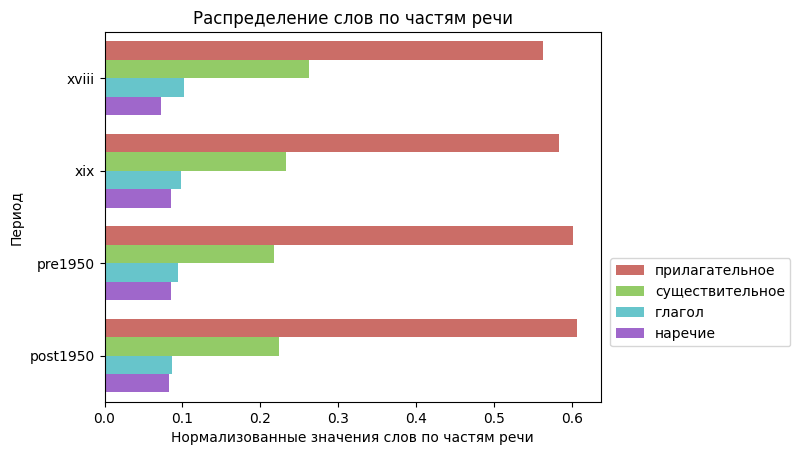

In [ ]:
df_pos = df_pos.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=df_pos, palette="hls")

ax.legend("Распределение слов по частям речи")
ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по частям речи')
plt.title("Распределение слов по частям речи")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.savefig("pos_periods.png")
plt.show()

# Семантическая когорта

In [ ]:
df_cohort = pd.concat([df_xviii["Семантическая когорта"].value_counts(), df_xix["Семантическая когорта"].value_counts(),
                    df_pre1950["Семантическая когорта"].value_counts(), df_post1950["Семантическая когорта"].value_counts()], axis=1)
df_cohort.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_cohort.iterrows():
  df_cohort.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_cohort.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_cohort.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_cohort.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]

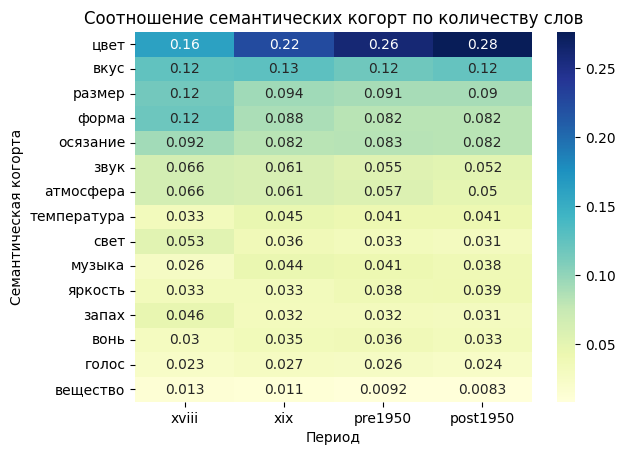

In [ ]:
df_cohort["Семантическая когорта"] = df_cohort.index
df_pivot = df_cohort.pivot_table(columns='Семантическая когорта', values=['xviii', 'xix', 'pre1950', 'post1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Соотношение семантических когорт по количеству слов')
plt.xlabel('Период')
plt.gca().invert_xaxis()
plt.savefig("cohorts.png")
plt.show()

In [ ]:
df_cohort = pd.concat([df_xviii["Семантическая когорта"].value_counts(), df_xix["Семантическая когорта"].value_counts(),
                    df_pre1950["Семантическая когорта"].value_counts(), df_post1950["Семантическая когорта"].value_counts()], axis=1)
df_cohort.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_cohort.iterrows():
  df_cohort.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_cohort.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_cohort.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_cohort.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]

In [ ]:
df_cohort["Семантическая когорта"] = df_cohort.index
df_pivot = df_cohort.pivot_table(columns='Семантическая когорта', values=['xviii', 'xix', 'pre1950', 'post1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Соотношение семантических когорт')
plt.xlabel('Период')
plt.gca().invert_xaxis()
plt.savefig("cohorts.png")
plt.show()

In [ ]:
ax = sns.countplot(data=df_norm, x="Семантическая когорта", order=df_norm["Семантическая когорта"].value_counts().index[:20])
ax.set_title('Семантические когорты (весь корпус)')
plt.xticks(rotation=45)
plt.savefig("cohorts_all_corpus.png")
plt.show()

In [ ]:
df_norm["Семантическая когорта"].value_counts()

In [ ]:
df_cohort = pd.concat([df_xviii["Семантическая когорта"].value_counts(), df_xix["Семантическая когорта"].value_counts(),
                    df_pre1950["Семантическая когорта"].value_counts(), df_post1950["Семантическая когорта"].value_counts()], axis=1)
df_cohort.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_cohort.iterrows():
  df_cohort.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_cohort.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_cohort.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_cohort.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]

cohort = df_cohort.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=cohort, palette="hls")

ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по семантическим когортам')
plt.title("Соотношение семантических когорт")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.savefig("cohorts_periods.png")
plt.show()

In [ ]:
sns.boxplot(data=df_cohort)
plt.title('Диапазон значений количества слов в семантических когортах')
plt.savefig("cohort_boxplot.png")
plt.show()

In [ ]:
sns.violinplot(data=df_cohort)
plt.title('Разнообразие семантических когорт в зависимости от периода')
plt.savefig("cohort_violinplot.png")
plt.show()

# Органы чувств

In [ ]:
df_vision = pd.concat([df_xviii["Зрение"].value_counts(), df_xix["Зрение"].value_counts(),
                    df_pre1950["Зрение"].value_counts(), df_post1950["Зрение"].value_counts()], axis=1)
df_vision.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_hearing = pd.concat([df_xviii["Слух"].value_counts(), df_xix["Слух"].value_counts(),
                    df_pre1950["Слух"].value_counts(), df_post1950["Слух"].value_counts()], axis=1)
df_hearing.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_taste = pd.concat([df_xviii["Вкус"].value_counts(), df_xix["Вкус"].value_counts(),
                    df_pre1950["Вкус"].value_counts(), df_post1950["Вкус"].value_counts()], axis=1)
df_taste.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_olfactory = pd.concat([df_xviii["Запах"].value_counts(), df_xix["Запах"].value_counts(),
                    df_pre1950["Запах"].value_counts(), df_post1950["Запах"].value_counts()], axis=1)
df_olfactory.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_touch = pd.concat([df_xviii["Осязание"].value_counts(), df_xix["Осязание"].value_counts(),
                    df_pre1950["Осязание"].value_counts(), df_post1950["Осязание"].value_counts()], axis=1)
df_touch.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_senses = pd.concat([df_vision, df_hearing, df_taste, df_olfactory, df_touch], keys=['зрение', 'слух', 'вкус', 'запах', 'осязание'])

for index, row in df_senses.iterrows():
  df_senses.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_senses.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_senses.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_senses.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]
df_senses

In [ ]:
df_senses = df_senses.drop(df_senses[df_senses.index == ('вкус', 0)].index)
df_senses = df_senses.drop(df_senses[df_senses.index == ('зрение', 0)].index)
df_senses = df_senses.drop(df_senses[df_senses.index == ('слух', 0)].index)
df_senses = df_senses.drop(df_senses[df_senses.index == ('запах', 0)].index)
df_senses = df_senses.drop(df_senses[df_senses.index == ('осязание', 0)].index)
df_senses

In [ ]:
feelings = ["зрение", "слух", "вкус", "запах", "осязание"]
df_senses["Чувство"] = feelings

In [ ]:
df_pivot = df_senses.pivot_table(index=df_senses["Чувство"], values=['xviii', 'xix', 'pre1950', 'post1950'])
ax = sns.heatmap(df_pivot, annot=True)
plt.title('Распределение сенсорных слов в зависимости от чувства')
plt.ylabel("Органы чувств")
plt.xlabel("Период")
plt.yticks(rotation=0)
plt.gca().invert_xaxis()
plt.savefig("senses.png")
plt.show()

# Устойчивая метафоричность

In [ ]:
df_metaphor = pd.concat([df_xviii["Устойчивая метафоричность"].value_counts(), df_xix["Устойчивая метафоричность"].value_counts(),
                    df_pre1950["Устойчивая метафоричность"].value_counts(), df_post1950["Устойчивая метафоричность"].value_counts()], axis=1)
df_metaphor.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_metaphor.iterrows():
  df_metaphor.at[index, "xviii"] = row["xviii"]/df_xviii.shape[0]
  df_metaphor.at[index, "xix"] = row["xix"]/df_xix.shape[0]
  df_metaphor.at[index, "pre1950"] = row["pre1950"]/df_pre1950.shape[0]
  df_metaphor.at[index, "post1950"] = row["post1950"]/df_post1950.shape[0]
df_metaphor

In [ ]:
df_metaphor = df_metaphor.drop(df_metaphor[df_metaphor.index == 0].index)

In [ ]:
metaphor = df_metaphor.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=metaphor, palette="hls")

ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по устойчивой метафоричности')
ax.get_legend().remove()
plt.title("Устойчивая метафоричность в подкорпусах")
plt.savefig("metaphors.png")
plt.show()

# Что, если считать валидными только сенсорную лексику без устойчивой метафоричности?

In [ ]:
df_norm_no_metaphors = df_norm.drop(df_norm[df_norm['Устойчивая метафоричность'] == 1].index)

## Сенсорная эксклюзивность

In [ ]:
df_xviii_no_metaphors = df_xviii.drop(df_xviii[df_xviii['Семантическая когорта'] == 'цвет'].index)
df_xix_no_metaphors = df_xix.drop(df_xix[df_xix['Семантическая когорта'] == 'цвет'].index)
df_pre1950_no_metaphors = df_pre1950.drop(df_pre1950[df_pre1950['Семантическая когорта'] == 'цвет'].index)
df_post1950_no_metaphors = df_post1950.drop(df_post1950[df_post1950['Семантическая когорта'] == 'цвет'].index)

In [ ]:
df_xviii_no_metaphors = df_xviii_no_metaphors.drop(df_xviii_no_metaphors[df_xviii_no_metaphors['xviii'] == 0].index)
df_xix_no_metaphors = df_xix_no_metaphors.drop(df_xix_no_metaphors[df_xix_no_metaphors['xix'] == 0].index)
df_pre1950_no_metaphors = df_pre1950_no_metaphors.drop(df_pre1950_no_metaphors[df_pre1950_no_metaphors['pre1950'] == 0].index)
df_post1950_no_metaphors = df_post1950_no_metaphors.drop(df_post1950_no_metaphors[df_post1950_no_metaphors['post1950'] == 0].index)

In [ ]:
df_xviii_no_metaphors = df_xviii_no_metaphors.reset_index()
df_xix_no_metaphors = df_xix_no_metaphors.reset_index()
df_pre1950_no_metaphors = df_pre1950_no_metaphors.reset_index()
df_post1950_no_metaphors = df_post1950_no_metaphors.reset_index()

In [ ]:
df_exclusivity_no_metaphors = pd.concat([df_xviii_no_metaphors["Сенсорная эксклюзивность"].value_counts(), df_xix_no_metaphors["Сенсорная эксклюзивность"].value_counts(),
                    df_pre1950_no_metaphors["Сенсорная эксклюзивность"].value_counts(), df_post1950_no_metaphors["Сенсорная эксклюзивность"].value_counts()], axis=1)
df_exclusivity_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_exclusivity_no_metaphors.iterrows():
  df_exclusivity_no_metaphors.at[index, "xviii"] = row["xviii"]/df_xviii_no_metaphors.shape[0]
  df_exclusivity_no_metaphors.at[index, "xix"] = row["xix"]/df_xix_no_metaphors.shape[0]
  df_exclusivity_no_metaphors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_no_metaphors.shape[0]
  df_exclusivity_no_metaphors.at[index, "post1950"] = row["post1950"]/df_post1950_no_metaphors.shape[0]

exclusivity_no_metaphors = df_exclusivity_no_metaphors.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=exclusivity_no_metaphors, palette="hls")

ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по сенсорной эксклюзивности')
plt.title("Распределение слов по сенсорной эксклюзивности (без метафоричности)")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0, title="Сенсорная\nэксклюзивность")
plt.savefig("sensory_exclusivity_no_metaphors.png")
plt.show()

## Части речи

In [ ]:
sns.displot(df_norm_no_metaphors, x="Часть речи", hue="Часть речи", binwidth=10)
plt.title('Распределение слов по частям речи (весь корпус)', loc="left")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("pos_all_corpus_no_metaphors.png")
plt.show()

In [ ]:
df_pos_no_metaphors = pd.concat([df_xviii_no_metaphors["Часть речи"].value_counts(), df_xix_no_metaphors["Часть речи"].value_counts(),
                    df_pre1950_no_metaphors["Часть речи"].value_counts(), df_post1950_no_metaphors["Часть речи"].value_counts()], axis=1)
df_pos_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_pos_no_metaphors.iterrows():
  df_pos_no_metaphors.at[index, "xviii"] = row["xviii"]/df_xviii_no_metaphors.shape[0]
  df_pos_no_metaphors.at[index, "xix"] = row["xix"]/df_xix_no_metaphors.shape[0]
  df_pos_no_metaphors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_no_metaphors.shape[0]
  df_pos_no_metaphors.at[index, "post1950"] = row["post1950"]/df_post1950_no_metaphors.shape[0]

In [ ]:
pos_no_metaphors = df_pos_no_metaphors.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=pos_no_metaphors, palette="hls")

ax.legend("Распределение слов по частям речи")
ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по частям речи')
plt.title("Распределение слов по частям речи (без метафоричности)")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.savefig("pos_periods_no_metaphors.png")
plt.show()

## Семантические когорты

In [ ]:
df_cohort_no_metaphors = pd.concat([df_xviii_no_metaphors["Семантическая когорта"].value_counts(), df_xix_no_metaphors["Семантическая когорта"].value_counts(),
                    df_pre1950_no_metaphors["Семантическая когорта"].value_counts(), df_post1950_no_metaphors["Семантическая когорта"].value_counts()], axis=1)
df_cohort_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_cohort_no_metaphors.iterrows():
  df_cohort_no_metaphors.at[index, "xviii"] = row["xviii"]/df_xviii_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "xix"] = row["xix"]/df_xix_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "post1950"] = row["post1950"]/df_post1950_no_metaphors.shape[0]

In [ ]:
df_cohort_no_metaphors["Семантическая когорта"] = df_cohort_no_metaphors.index
df_pivot = df_cohort_no_metaphors.pivot_table(columns='Семантическая когорта', values=['xviii', 'xix', 'pre1950', 'post1950'])
top = df_pivot.sum().nlargest(50).index.tolist()
sns.heatmap(df_pivot.loc[:, top].transpose(), cmap='YlGnBu', annot=True)
plt.title('Соотношение семантических когорт (без метафоричности)')
plt.xlabel('Период')
plt.gca().invert_xaxis()
plt.savefig("cohorts_no_metaphors.png")
plt.show()

In [ ]:
ax = sns.countplot(data=df_norm_no_metaphors, x="Семантическая когорта", order=df_norm_no_metaphors["Семантическая когорта"].value_counts().index[:20])
ax.set_title('Семантические когорты (весь корпус - без метафоричности)')
plt.xticks(rotation=45)
plt.savefig("cohorts_all_corpus_no_metaphors.png")
plt.show()

In [ ]:
df_cohort_no_metaphors = pd.concat([df_xviii_no_metaphors["Семантическая когорта"].value_counts(), df_xix_no_metaphors["Семантическая когорта"].value_counts(),
                    df_pre1950_no_metaphors["Семантическая когорта"].value_counts(), df_post1950_no_metaphors["Семантическая когорта"].value_counts()], axis=1)
df_cohort_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_cohort_no_metaphors.iterrows():
  df_cohort_no_metaphors.at[index, "xviii"] = row["xviii"]/df_xviii_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "xix"] = row["xix"]/df_xix_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_no_metaphors.shape[0]
  df_cohort_no_metaphors.at[index, "post1950"] = row["post1950"]/df_post1950_no_metaphors.shape[0]

cohort_no_metaphors = df_cohort_no_metaphors.reset_index().melt('index', var_name='cols',  value_name='vals')
ax = sns.barplot(x="vals", y="cols", hue='index', data=cohort_no_metaphors, palette="hls")

ax.set_ylabel('Период')
ax.set_xlabel('Нормализованные значения слов по семантическим когортам')
plt.title("Распределение слов по семантическим когортам (без метафоричности)")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.savefig("cohort_periods_no_metaphors.png")
plt.show()

In [ ]:
sns.boxplot(data=df_cohort_no_metaphors)
plt.title('Разнообразие семантических когорт в зависимости от периода')
plt.savefig("cohort_boxplot_no_metaphors.png")
plt.show()

## Органы чувств

In [ ]:
df_vision_no_metaphors = pd.concat([df_xviii_no_metaphors["Зрение"].value_counts(), df_xix_no_metaphors["Зрение"].value_counts(),
                    df_pre1950_no_metaphors["Зрение"].value_counts(), df_post1950_no_metaphors["Зрение"].value_counts()], axis=1)
df_vision_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_hearing_no_metaphors = pd.concat([df_xviii_no_metaphors["Слух"].value_counts(), df_xix_no_metaphors["Слух"].value_counts(),
                    df_pre1950_no_metaphors["Слух"].value_counts(), df_post1950_no_metaphors["Слух"].value_counts()], axis=1)
df_hearing_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_taste_no_metaphors = pd.concat([df_xviii_no_metaphors["Вкус"].value_counts(), df_xix_no_metaphors["Вкус"].value_counts(),
                    df_pre1950_no_metaphors["Вкус"].value_counts(), df_post1950_no_metaphors["Вкус"].value_counts()], axis=1)
df_taste_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_olfactory_no_metaphors = pd.concat([df_xviii_no_metaphors["Запах"].value_counts(), df_xix_no_metaphors["Запах"].value_counts(),
                    df_pre1950_no_metaphors["Запах"].value_counts(), df_post1950_no_metaphors["Запах"].value_counts()], axis=1)
df_olfactory_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_touch_no_metaphors = pd.concat([df_xviii_no_metaphors["Осязание"].value_counts(), df_xix_no_metaphors["Осязание"].value_counts(),
                    df_pre1950_no_metaphors["Осязание"].value_counts(), df_post1950_no_metaphors["Осязание"].value_counts()], axis=1)
df_touch_no_metaphors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

df_senses_no_metaphors = pd.concat([df_vision_no_metaphors, df_hearing_no_metaphors, df_taste_no_metaphors, df_olfactory_no_metaphors, df_touch_no_metaphors], keys=['зрение', 'слух', 'вкус', 'запах', 'осязание'])

for index, row in df_senses_no_metaphors.iterrows():
  df_senses_no_metaphors.at[index, "xviii"] = row["xviii"]/df_xviii_no_metaphors.shape[0]
  df_senses_no_metaphors.at[index, "xix"] = row["xix"]/df_xix_no_metaphors.shape[0]
  df_senses_no_metaphors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_no_metaphors.shape[0]
  df_senses_no_metaphors.at[index, "post1950"] = row["post1950"]/df_post1950_no_metaphors.shape[0]

In [ ]:
df_senses_no_metaphors = df_senses_no_metaphors.drop(df_senses_no_metaphors[df_senses_no_metaphors.index == ('вкус', 0)].index)
df_senses_no_metaphors = df_senses_no_metaphors.drop(df_senses_no_metaphors[df_senses_no_metaphors.index == ('зрение', 0)].index)
df_senses_no_metaphors = df_senses_no_metaphors.drop(df_senses_no_metaphors[df_senses_no_metaphors.index == ('слух', 0)].index)
df_senses_no_metaphors = df_senses_no_metaphors.drop(df_senses_no_metaphors[df_senses_no_metaphors.index == ('запах', 0)].index)
df_senses_no_metaphors = df_senses_no_metaphors.drop(df_senses_no_metaphors[df_senses_no_metaphors.index == ('осязание', 0)].index)

In [ ]:
feelings = ["зрение", "слух", "вкус", "запах", "осязание"]
df_senses_no_metaphors["Чувство"] = feelings

In [ ]:
df_pivot = df_senses.pivot_table(index=df_senses["Чувство"], values=['xviii', 'xix', 'pre1950', 'post1950'])
ax = sns.heatmap(df_pivot, annot=True)
plt.title('Распределение сенсорных слов в зависимости от чувства')
plt.ylabel("Органы чувств")
plt.xlabel("Период")
plt.yticks(rotation=0)
plt.gca().invert_xaxis()
plt.savefig("senses_no_metaphors.png")
plt.show()

# Цвет

In [ ]:
source = pd.read_csv("colors.csv")

In [ ]:
for index, row in colors.iterrows():
    if row["Слово"] in source["Белый"].values:
      colors.at[index, "Цвет"] = "белый"
    if row["Слово"] in source["Чёрный"].values:
      colors.at[index, "Цвет"] = "чёрный"
    if row["Слово"] in source["Коричневый"].values:
      colors.at[index, "Цвет"] = "коричневый"
    if row["Слово"] in source["Синий"].values:
      colors.at[index, "Цвет"] = "синий"
    if row["Слово"] in source["Голубой"].values:
      colors.at[index, "Цвет"] = "голубой"
    if row["Слово"] in source["Зелёный"].values:
      colors.at[index, "Цвет"] = "зелёный"
    if row["Слово"] in source["Фиолетовый"].values:
      colors.at[index, "Цвет"] = "фиолетовый"
    if row["Слово"] in source["Серый"].values:
      colors.at[index, "Цвет"] = "серый"
    if row["Слово"] in source["Розовый"].values:
      colors.at[index, "Цвет"] = "розовый"
    if row["Слово"] in source["Оранжевый"].values:
      colors.at[index, "Цвет"] = "оранжевый"
    if row["Слово"] in source["Красный"].values:
      colors.at[index, "Цвет"] = "красный"
    if row["Слово"] in source["Бежевый"].values:
      colors.at[index, "Цвет"] = "бежевый"
    if row["Слово"] in source["Жёлтый"].values:
      colors.at[index, "Цвет"] = "жёлтый"
    if row["Слово"] in source["Золотой"].values:
      colors.at[index, "Цвет"] = "золотой"
    if row["Слово"] in source["Серебряный"].values:
      colors.at[index, "Цвет"] = "серебряный"

In [ ]:
colors.loc[(colors["Цвет"] == "красный")]

In [ ]:
df_xviii_colors = colors.drop(columns=["xix", "pre1950", "post1950"])
df_xix_colors = colors.drop(columns=["xviii", "pre1950", "post1950"])
df_pre1950_colors = colors.drop(columns=["xviii", "xix", "post1950"])
df_post1950_colors = colors.drop(columns=["xviii", "xix", "pre1950"])

In [ ]:
df_xviii_colors = df_xviii_colors.drop(df_xviii_colors[df_xviii_colors['xviii'] == 0].index)
df_xix_colors = df_xix_colors.drop(df_xix_colors[df_xix_colors['xix'] == 0].index)
df_pre1950_colors = df_pre1950_colors.drop(df_pre1950_colors[df_pre1950_colors['pre1950'] == 0].index)
df_post1950_colors = df_post1950_colors.drop(df_post1950_colors[df_post1950_colors['post1950'] == 0].index)

In [ ]:
df_xviii_colors = df_xviii_colors.reset_index()
df_xix_colors = df_xix_colors.reset_index()
df_pre1950_colors = df_pre1950_colors.reset_index()
df_post1950_colors = df_post1950_colors.reset_index()

In [ ]:
df_xviii_colors

In [ ]:
df_colors = pd.concat([df_xviii_colors["Цвет"].value_counts(), df_xix_colors["Цвет"].value_counts(),
                    df_pre1950_colors["Цвет"].value_counts(), df_post1950_colors["Цвет"].value_counts()], axis=1)
df_colors.columns = ['xviii', 'xix', 'pre1950', 'post1950']

for index, row in df_colors.iterrows():
  df_colors.at[index, "xviii"] = row["xviii"]/df_xviii_colors.shape[0]
  df_colors.at[index, "xix"] = row["xix"]/df_xix_colors.shape[0]
  df_colors.at[index, "pre1950"] = row["pre1950"]/df_pre1950_colors.shape[0]
  df_colors.at[index, "post1950"] = row["post1950"]/df_post1950_colors.shape[0]

#df_colors["Цвет"] = df_colors.index
df_colors

In [ ]:
df_pivot = df_colors.pivot_table(index=df_colors.index, values=['xviii', 'xix', 'pre1950', 'post1950'])
ax = sns.heatmap(df_colors, annot=True)
plt.title('Тепловая карта слов, связанных с цветом')
plt.ylabel("Цвета")
plt.xlabel("Период")
plt.yticks(rotation=0)
plt.savefig("colors.png")
plt.show()